# Run All Upscalers

This book runs all the upscalers available in this `upscalers` project, collecting the single-image performance timings and providing the image output for visual comparison.

In [1]:
# initialize
import sys
sys.path.append("..")
from matplotlib.pyplot import imshow, show
from timeit import default_timer as timer

from upscalers import upscale, available_models, clear_on_device_caches

In [2]:
# check what models are available
available_models()

['None',
 'Lanczos',
 'Nearest',
 'ESRGAN_4x',
 'ScuNET',
 'ScuNET PSNR',
 'SwinIR_4x',
 'R-ESRGAN General 4xV3',
 'R-ESRGAN General WDN 4xV3',
 'R-ESRGAN AnimeVideo',
 'R-ESRGAN 4x+',
 'R-ESRGAN 4x+ Anime6B',
 'R-ESRGAN 2x+']

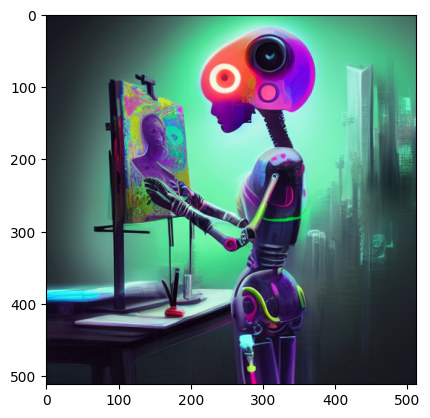

In [3]:
# load a test image
from PIL import Image
image = Image.open('./test_image.png')
imshow(image)

In [6]:
# try all the upscalers!
scale_factor = 4.0
for upscaler_name in available_models():
  clear_on_device_caches()
  timings = [] 
  result = None  
  for i in range(0,10):
      start = timer() 
      result = upscale(upscaler_name, image, scale_factor)
      timings.append(timer() - start)
  result.save(f"./results/{upscaler_name}.png")
  # other than first iteration      
  mean_time = sum(timings[1::-1]) / len(timings[1::-1])  
  print(f"{upscaler_name}: Avg: {mean_time:.2f}, Warmup iteration: {timings[0]:.2f}, 2nd: {timings[1]:.2f}, 3rd: {timings[2]:.2f}")
  #imshow(result)
  #show()
  


None: Avg: 0.04, Warmup iteration: 0.04, 2nd: 0.04, 3rd: 0.04
Lanczos: Avg: 0.04, Warmup iteration: 0.04, 2nd: 0.04, 3rd: 0.04
Nearest: Avg: 0.00, Warmup iteration: 0.00, 2nd: 0.00, 3rd: 0.00
ESRGAN_4x: Avg: 1.40, Warmup iteration: 1.20, 2nd: 1.60, 3rd: 1.41
ScuNET: Avg: 0.25, Warmup iteration: 0.34, 2nd: 0.16, 3rd: 0.16
ScuNET PSNR: Avg: 0.23, Warmup iteration: 0.30, 2nd: 0.16, 3rd: 0.16


SwinIR tiles: 100%|███████████████████████████████| 9/9 [00:01<00:00,  4.59it/s]


SwinIR_4x: Avg: 4.77, Warmup iteration: 5.15, 2nd: 4.40, 3rd: 4.48
R-ESRGAN General 4xV3: Avg: 2.61, Warmup iteration: 2.45, 2nd: 2.76, 3rd: 4.04
R-ESRGAN General WDN 4xV3: Avg: 3.08, Warmup iteration: 2.57, 2nd: 3.59, 3rd: 2.64
R-ESRGAN AnimeVideo: Avg: 2.12, Warmup iteration: 1.22, 2nd: 3.03, 3rd: 2.51
R-ESRGAN 4x+: Avg: 2.67, Warmup iteration: 2.85, 2nd: 2.48, 3rd: 1.78
R-ESRGAN 4x+ Anime6B: Avg: 2.67, Warmup iteration: 2.99, 2nd: 2.35, 3rd: 3.96
R-ESRGAN 2x+: Avg: 2.60, Warmup iteration: 1.71, 2nd: 3.50, 3rd: 3.45
